# 2024亚太杯C题第二问

## 一、数据导入和平稳性检验
采用图检验，发现数据均值不为常数，显然不平稳

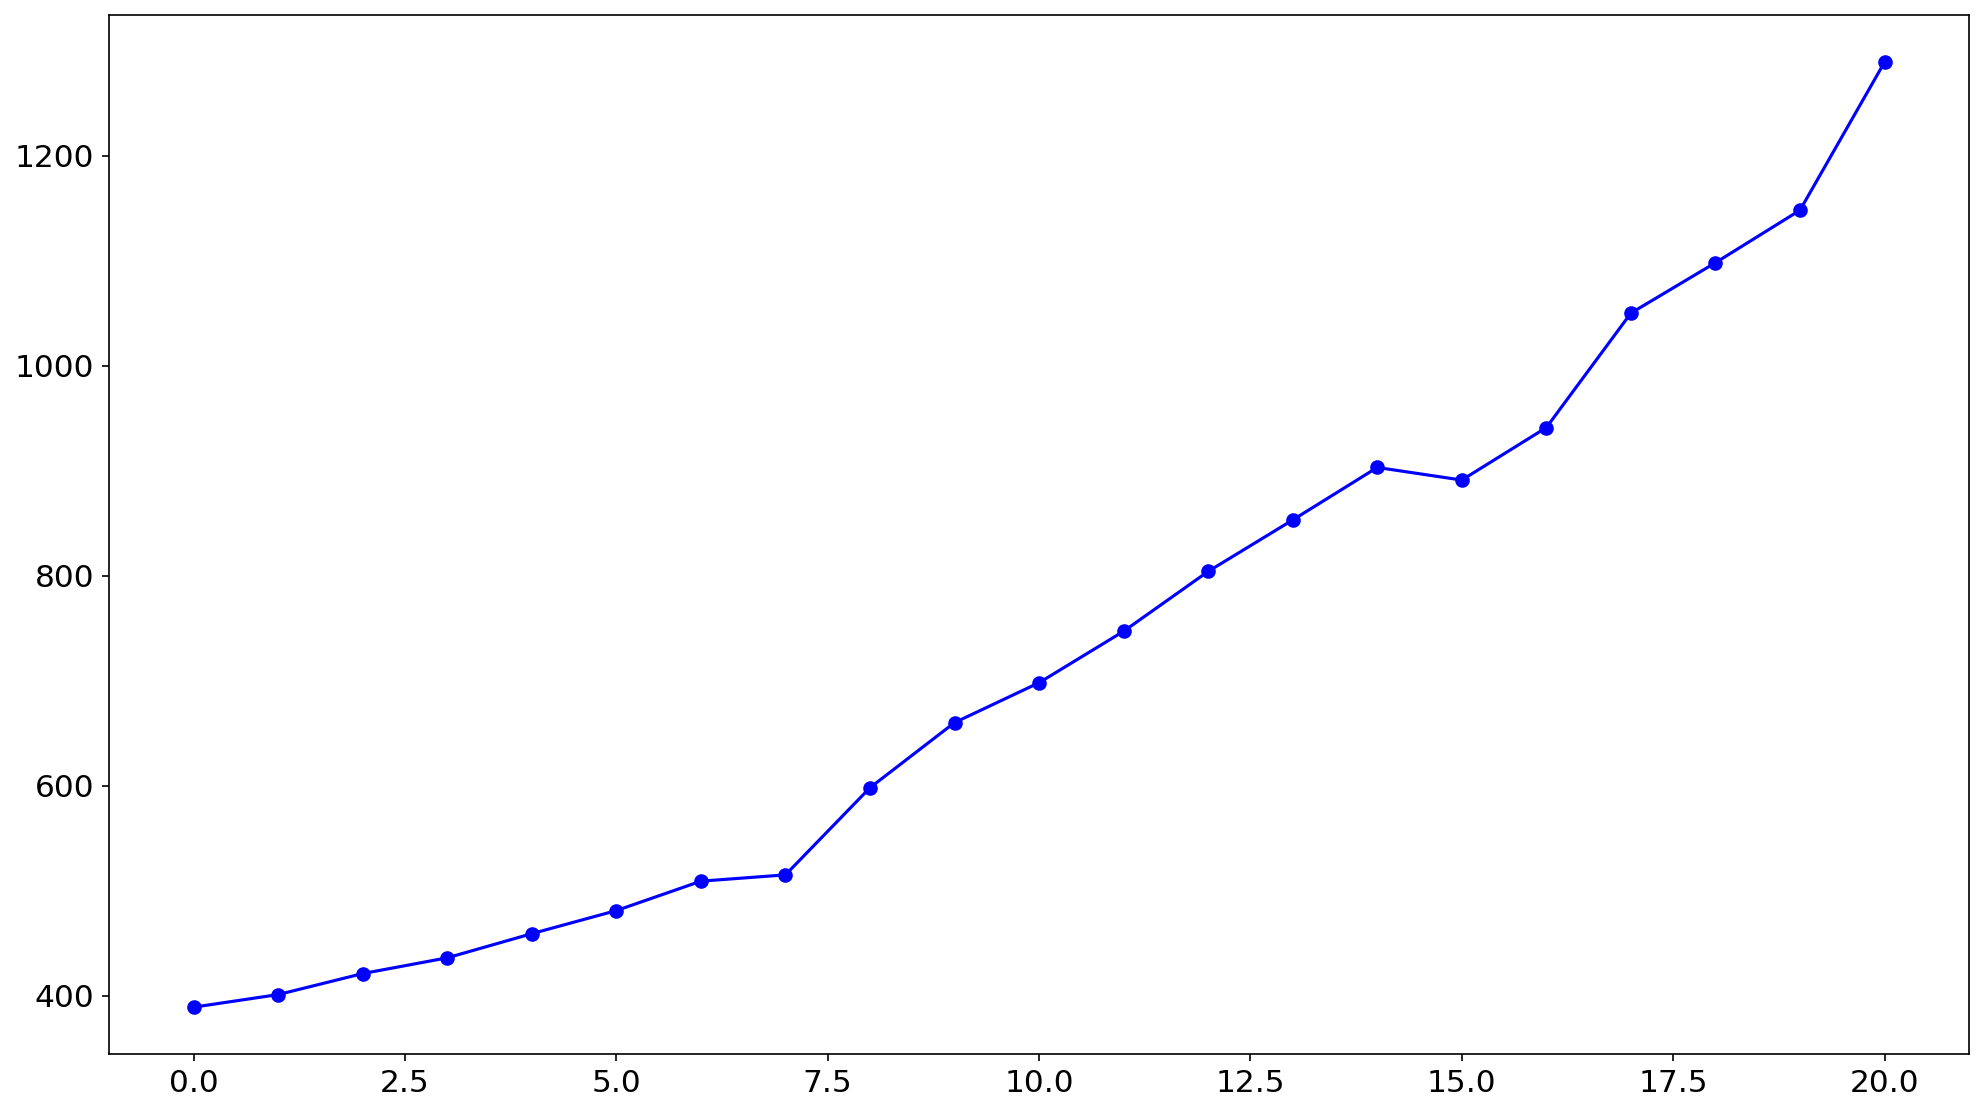

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import acorr_lm


## 数据导入
data = [389, 401, 421, 436, 459, 481, 509, 515, 598, 660, 698, 747, 804, 853, 903, 891, 941, 1050, 1098, 1148, 1289]

# 绘制序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(data, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='全球宠物食品需求消费额.png')

## 二、差分与平稳性检验
### 2.1 一阶差分
为了解决不平稳的问题，先采用一阶差分

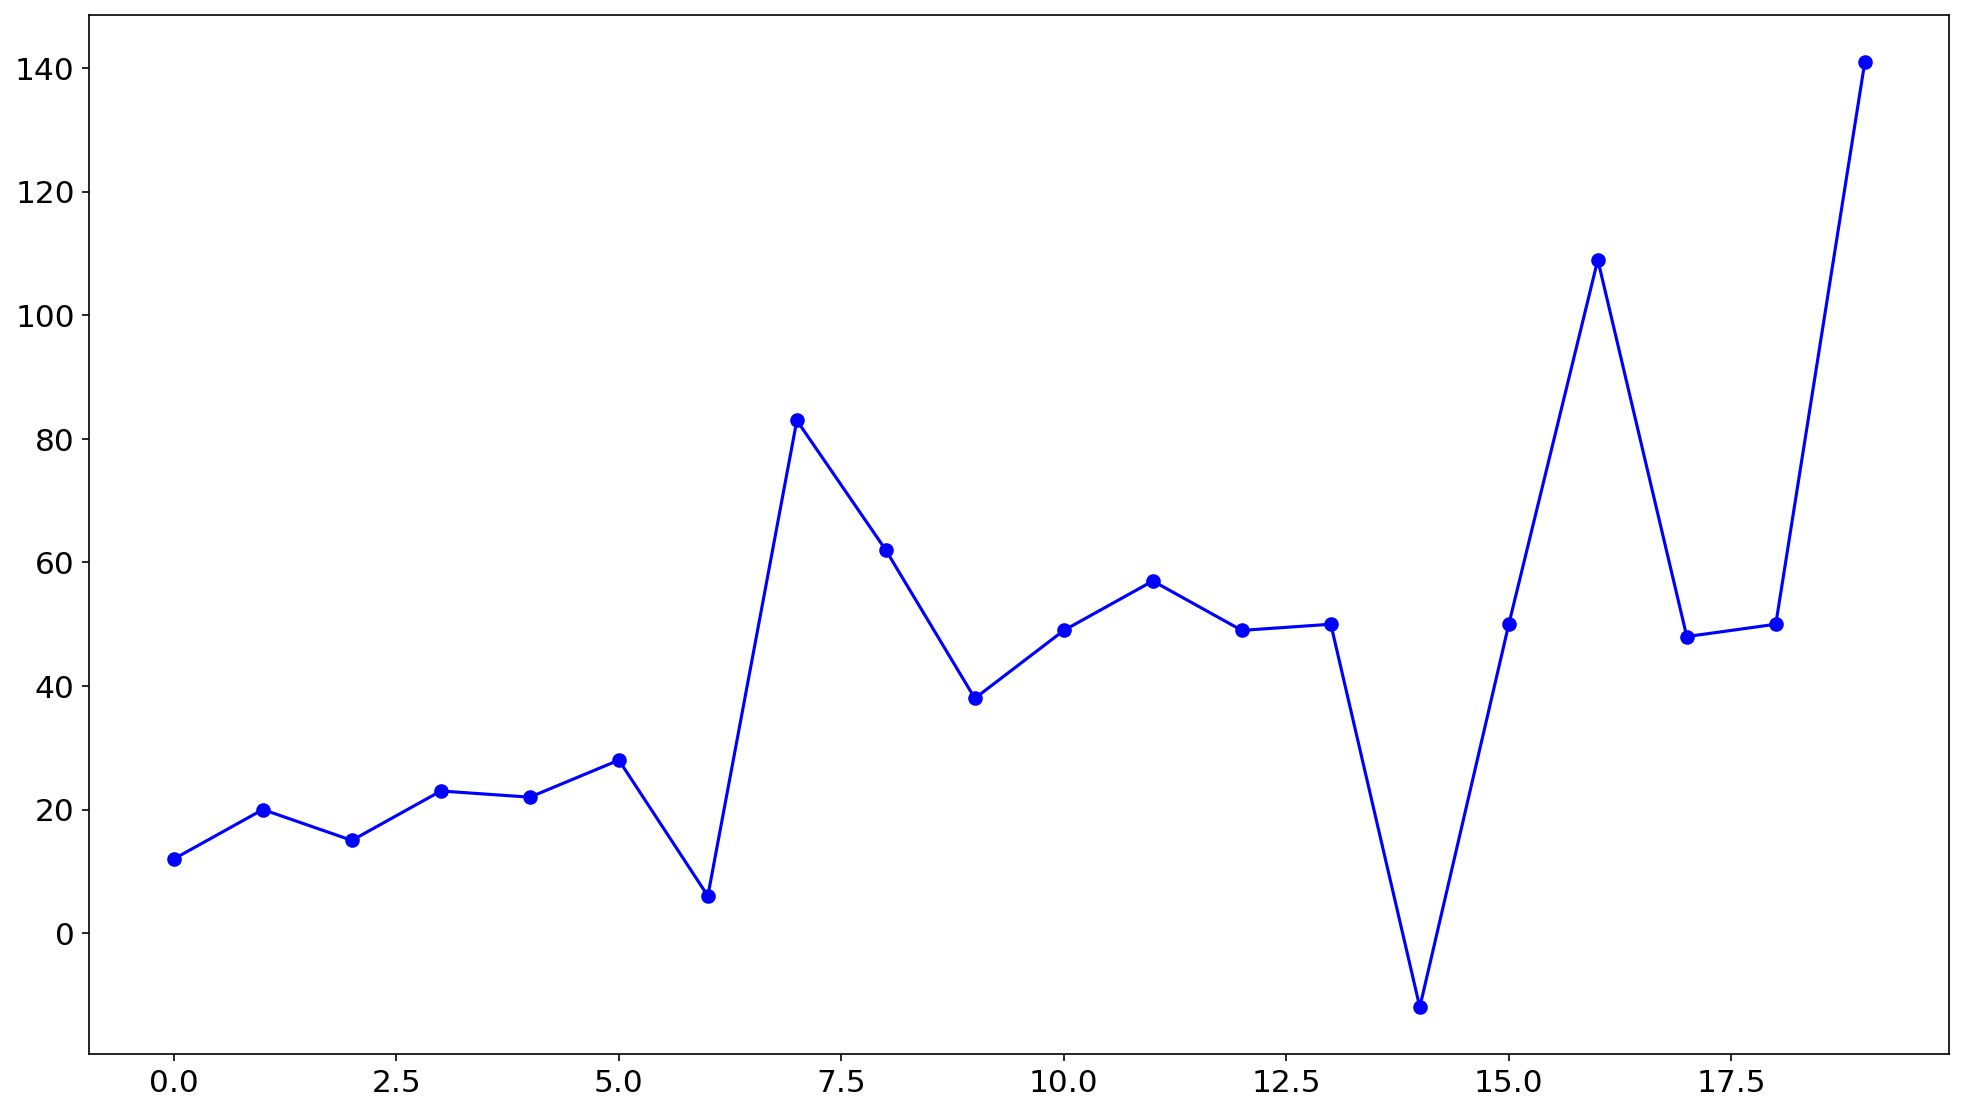

In [4]:
## 数据差分与平稳性检验
# 一阶差分
first_order_diff = np.diff(data)

# 绘制一阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(first_order_diff, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='一阶差分后的的序列图.png')

### 2.2 ADF检验
原假设$$H0:序列非平稳$$
备择假设$$H1:序列平稳$$

In [5]:
# 对一阶差分后的数据做 ADF 检验
result_first_order = adfuller(first_order_diff , autolag='AIC')
print(f'一阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_first_order[1]}')
print(f'临界值（1%）：{result_first_order[4]["1%"]}')
print(f'临界值（5%）：{result_first_order[4]["5%"]}')
print(f'临界值（10%）：{result_first_order[4]["10%"]}')

if result_first_order[1] < 0.05:
    print('一阶差分数据是平稳的。')
else:
    print('一阶差分数据不是平稳的。')

一阶差分后 ADF 检验统计量：0.8950121108531356
p 值：0.9930248865645486
临界值（1%）：-4.223238279489106
临界值（5%）：-3.189368925619835
临界值（10%）：-2.729839421487603
一阶差分数据不是平稳的。


### 2.3 PP检验
原假设$$H0:时间序列包含单位根$$
备择假设$$H1:时间序列为弱平稳$$

In [6]:
# 对一阶差分后的数据做 PP 检验
pp = PhillipsPerron(first_order_diff)
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下一阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下一阶差分后的数据是非平稳数据。")

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.422
P-value                         0.136
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.83 (1%), -3.03 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
不拒绝原假设，PP检验下一阶差分后的数据是非平稳数据。


### 2.4 二阶差分
通过上述分析：即使通过一阶差分也无法实现数据平稳，进一步使用二阶差分

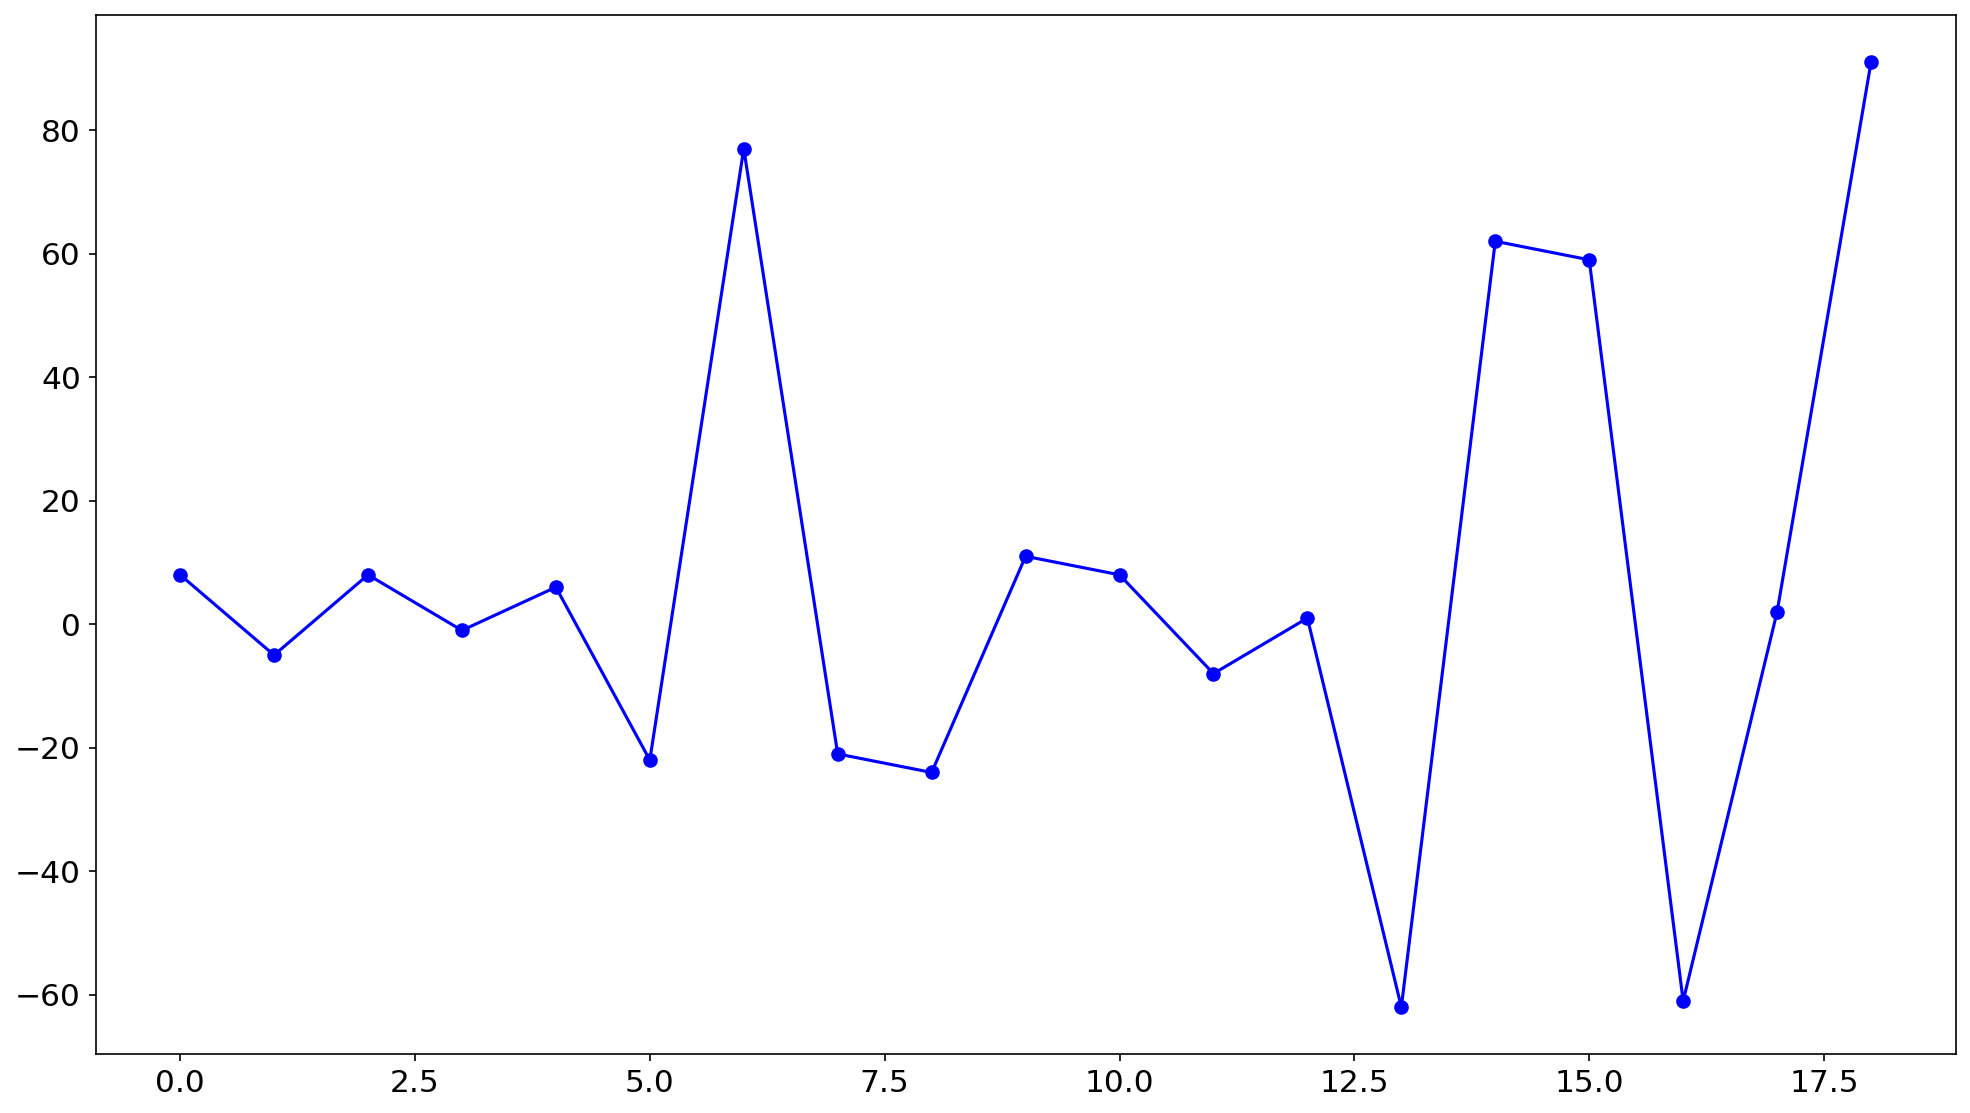

In [7]:
# 二阶差分
second_order_diff = np.diff(first_order_diff)

# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(second_order_diff, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='二阶差分后的的序列图.png')

### 2.5 ADF检验
原假设$$H0:序列非平稳$$
备择假设$$H1:序列平稳$$

In [8]:
# 对二阶差分后的数据做 ADF 检验
result_second_order = adfuller(second_order_diff , autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_second_order[0]}')
print(f'p 值：{result_second_order[1]}')
print(f'临界值（1%）：{result_second_order[4]["1%"]}')
print(f'临界值（5%）：{result_second_order[4]["5%"]}')
print(f'临界值（10%）：{result_second_order[4]["10%"]}')

if result_second_order[1] < 0.05:
    print('二阶差分数据是平稳的。')
else:
    print('二阶差分数据不是平稳的。')

二阶差分后 ADF 检验统计量：-4.330302336798909
p 值：0.00039349579179475877
临界值（1%）：-4.137829282407408
临界值（5%）：-3.1549724074074077
临界值（10%）：-2.7144769444444443
二阶差分数据是平稳的。


### 2.6 PP检验
原假设$$H0:时间序列包含单位根$$
备择假设$$H1:时间序列为弱平稳$$

In [9]:
# 对二阶差分后的数据做 PP 检验
pp = PhillipsPerron(second_order_diff)
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下二阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下二阶差分后的数据是非平稳数据。")

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.028
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.86 (1%), -3.04 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下二阶差分后的数据是平稳数据。


## 三、纯随机检验
已经判断差分后的序列为平稳性数据，进一步判断是否为白噪声数据，采用LB检验。  
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$
从结果上来看，p值小于0.05，拒绝原假设，认为这一组序列为非白噪声序列，不具有纯随机性。

In [10]:
## 纯随机检验
LB = acorr_ljungbox(data, lags=range(1, 10), boxpierce=True, return_df=True)
print(LB)

     lb_stat     lb_pvalue    bp_stat     bp_pvalue
1  16.878591  3.984852e-05  14.677035  1.275914e-04
2  29.381771  4.167058e-07  25.005750  3.715955e-06
3  38.028352  2.787678e-08  31.772639  5.843875e-07
4  43.225746  9.289754e-09  35.614191  3.473748e-07
5  46.173561  8.372355e-09  37.664845  4.405729e-07
6  47.523760  1.470929e-08  38.545410  8.786572e-07
7  47.741170  4.000435e-08  38.677746  2.251493e-06
8  47.809160  1.074511e-07  38.716175  5.548601e-06
9  48.683413  1.902740e-07  39.172307  1.072488e-05


## 四、模型识别
### 4.1 相关图识别

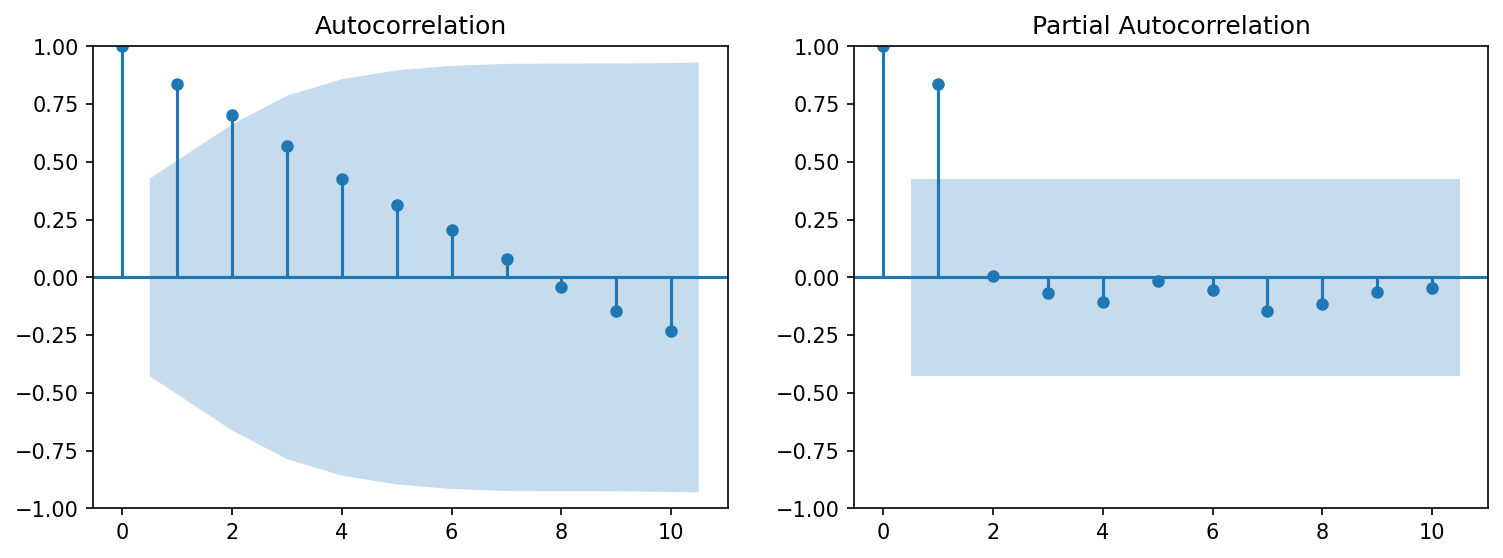

In [10]:
## 模型识别
# 绘制自相关图和偏自相关图并识别模型
fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(data, lags=10, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(data, lags=10, ax=ax2)
plt.savefig(fname='相关图.png')

### 4.2 自动识别
相关图难以判断，使用auto_arima比较AIC自动识别模型

In [13]:
# 识别模型
series = pd.Series(data)
model = auto_arima(series, seasonal= False, trace=True)
print(f"自动识别的阶数：(p, d, q) = {model.order}")

'''模型识别为ARIMA(0,2,0)'''

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=197.952, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=198.506, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=196.496, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.242 seconds
自动识别的阶数：(p, d, q) = (0, 2, 0)


'模型识别为ARIMA(0,2,0)'

结合自相关系数和偏自相关系数，以及AIC判断，最终确定最优模型：  
$$ARIMA(0,2,0)$$
均值模型为：随机游走模型

## 五、模型拟合与参数检验

In [14]:
## 拟合模型
mod = sm.tsa.statespace.SARIMAX(data, order=(0,2,0))
res = mod.fit() 
print(res.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63320D+00    |proj g|=  2.47698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   7.387D-06   4.631D+00
  F =   4.6308569649043774     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1633.4079    510.372    

 This problem is unconstrained.


结果表明：参数检验通过

## 六、模型的整体效果检验
### 6.1 残差的纯随机性检验

In [15]:
## 均值模型的整体效果检验
# 计算残差序列
residuals = res.resid

# 输出残差序列
print("残差序列：", residuals)

# 检验残差序列为白噪声
LB = acorr_ljungbox(residuals, lags=range(1, 10), boxpierce=True, return_df=True)
print(LB)

残差序列： [ 389.         -182.65871929    8.           -5.            8.
   -1.            6.          -22.           77.          -21.
  -24.           11.            8.           -8.            1.
  -62.           62.           59.          -61.            2.
   91.        ]
    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  3.279825   0.070136  2.852021   0.091259
2  3.345127   0.187765  2.905967   0.233872
3  3.353619   0.340249  2.912613   0.405296
4  3.391521   0.494563  2.940627   0.567810
5  3.417428   0.635917  2.958650   0.706361
6  3.437439   0.752274  2.971700   0.812390
7  4.320429   0.742219  3.509172   0.834253
8  5.524907   0.700279  4.189964   0.839590
9  5.525146   0.786341  4.190089   0.898462


### 6.2残差的正态性检验
#### 判断标准化残差是否服从标准正态分布  
检验：$$E(\epsilon_t)=0$$
$$D(\epsilon_t)=1$$
$$\epsilon_t服从N(0,1)$$
#### 残差的自相关函数  
计算判断各个残差之间是否相关
#### LB检验  
原假设H0：这组数据为纯随机的，序列值之间相互独立。
$$
H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1
$$  
备择假设H1：这组数据非白噪声序列，至少存在一个自相关系数不为零。
$$
H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m
$$  
采用LB统计量作为检验统计量：
$$
LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)
$$

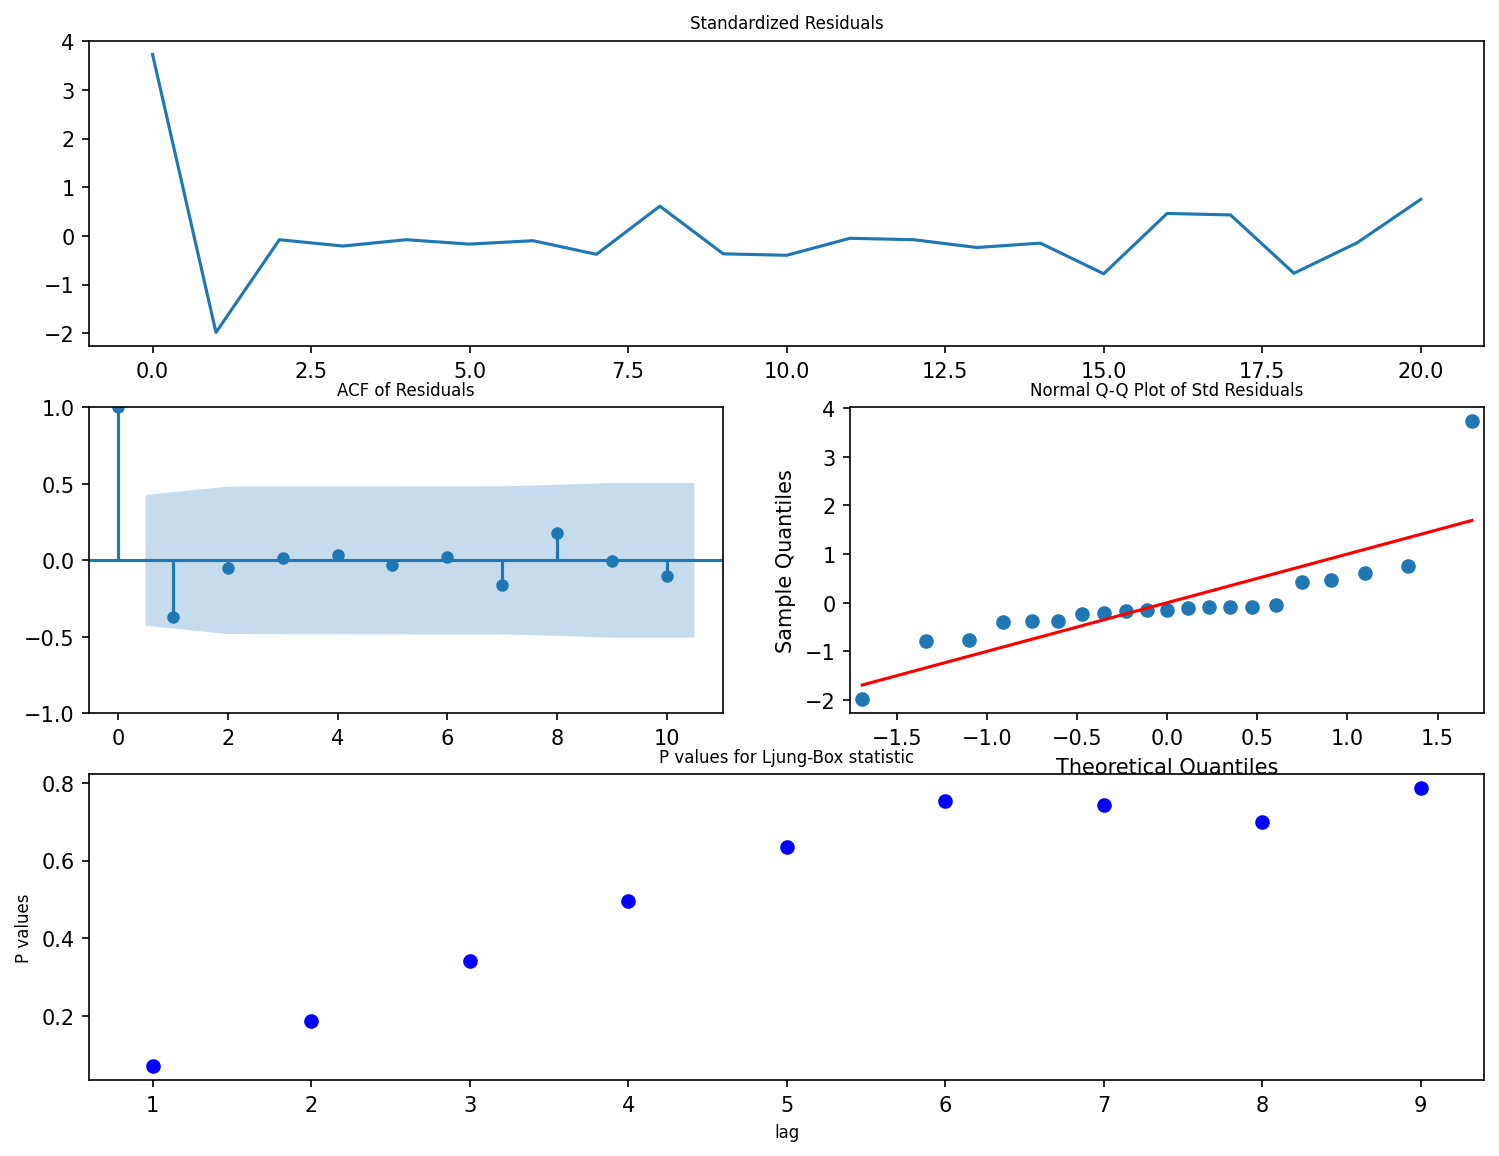

In [16]:

resid_sd = (residuals-np.mean(residuals))/np.std(residuals)
fig = plt.figure(figsize=(12,9),dpi=150)  
ax1 = fig.add_subplot(311)  
ax1.plot(resid_sd);plt.title('Standardized Residuals', fontsize=8)  

ax2 = fig.add_subplot(323)  
plot_acf(residuals, ax=ax2)
plt.title('ACF of Residuals', fontsize=8)  

ax3 = fig.add_subplot(324)  
sm.qqplot(resid_sd, fit=True, line="s",ax=ax3)  
plt.title('Normal Q-Q Plot of Std Residuals', fontsize=8)  

lags = np.arange(1,10)
LB_p = LB.lb_pvalue
ax4 = fig.add_subplot(313)  
ax4.scatter(lags,LB_p,color="blue")
plt.xlabel(xlabel="lag", fontsize=8)  
plt.ylabel(ylabel="P values", fontsize=8)  
plt.title('P values for Ljung-Box statistic', fontsize=8)   
plt.savefig(fname='整体效果检验.png')

### 6.3 残差的自相关性检验
#### 6.3.1 DW检验
原假设$$ H0：P = 0（残差项不存在一阶序列相关）$$
备择假设$$  H1：P ≠ 0（残差项存在一阶序列相关）$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [17]:
## 残差的自相关检验
# DW检验
dw_stat = durbin_watson(residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验下不存在一阶自相关")


DW统计量: 1.9979836996854143
DW检验下不存在一阶自相关


#### 6.3.2 Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [18]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(residuals)
var_beta_1 = np.var(residuals)  # 不知道这个方差写错了没
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: -0.00019944291891736256
Dh检验下不拒绝原假设，残差不存在自相关性


### 6.4 残差的异方差性检验
#### 6.4.1 White 检验
原假设$$H0：残差项的方差是常数，不存在异方差$$ 
备择假设$$H1：残差项的方差是不常数，存在异方差$$
采用LM统计量作为检验统计量：
$$
LM=nR^2\sim \chi^2_\alpha(q)
$$

In [19]:

## 异方差检验
# White 检验
data_for_white_test = data[:len(residuals)]
exog = np.column_stack((np.ones(len(residuals)), data_for_white_test))

white_test_results = het_white(residuals, exog)
print(f"White 检验统计量：{white_test_results[0]}")
print(f"White 检验的p 值：{white_test_results[1]}")

if white_test_results[1] < 0.05:
    print('White检验下存在异方差性。')
else:
    print('White检验下不存在异方差性。')

White 检验统计量：4.458925247474842
White 检验的p 值：0.10758622889015067
White检验下不存在异方差性。


#### 6.4.2 Portmanteau Q检验
原假设
$$H0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [20]:
# Portmanteau Q检验
Q = acorr_ljungbox(residuals**2, lags=range(1, 10), boxpierce = True, return_df = True )
print(Q)
# p值小于0.05拒绝原假设，存在异方差性

    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  0.976897   0.322966  0.849476   0.356701
2  0.984181   0.611347  0.855493   0.651977
3  0.996004   0.802219  0.864746   0.833926
4  1.013042   0.907812  0.877339   0.927789
5  1.036306   0.959585  0.893522   0.970689
6  1.067725   0.982914  0.914013   0.988663
7  1.087006   0.993300  0.925750   0.995939
8  1.087048   0.997636  0.925773   0.998675
9  1.147411   0.999016  0.957267   0.999530


#### 6.4.3 拉格朗日乘子(LM)检验
$$H0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [21]:
# LM检验
for n in range(1, 10):
    alm = acorr_lm(residuals, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(9.481969826845313, 0.002075010514029933)
(3.8676336122054447, 0.14459525187013417)
(6.751438641638514, 0.08025671863096027)
(8.701176263051316, 0.06901843435281368)
(8.392166156749242, 0.1359060195681028)
(8.261794423577264, 0.21954416133590277)
(10.577633084631863, 0.15813293510165743)
(11.334128405217795, 0.18347612945760608)
(11.699375179831192, 0.23079248755424842)


## 七、模型的预测

     mean     mean_se     90%lower     90%upper     95%lower     95%upper
0  1430.0   40.415441  1363.522516  1496.477484  1350.787192  1509.212808
1  1571.0   90.371673  1422.351826  1719.648174  1393.874776  1748.125224
2  1712.0  151.220733  1463.264029  1960.735971  1415.612810  2008.387190


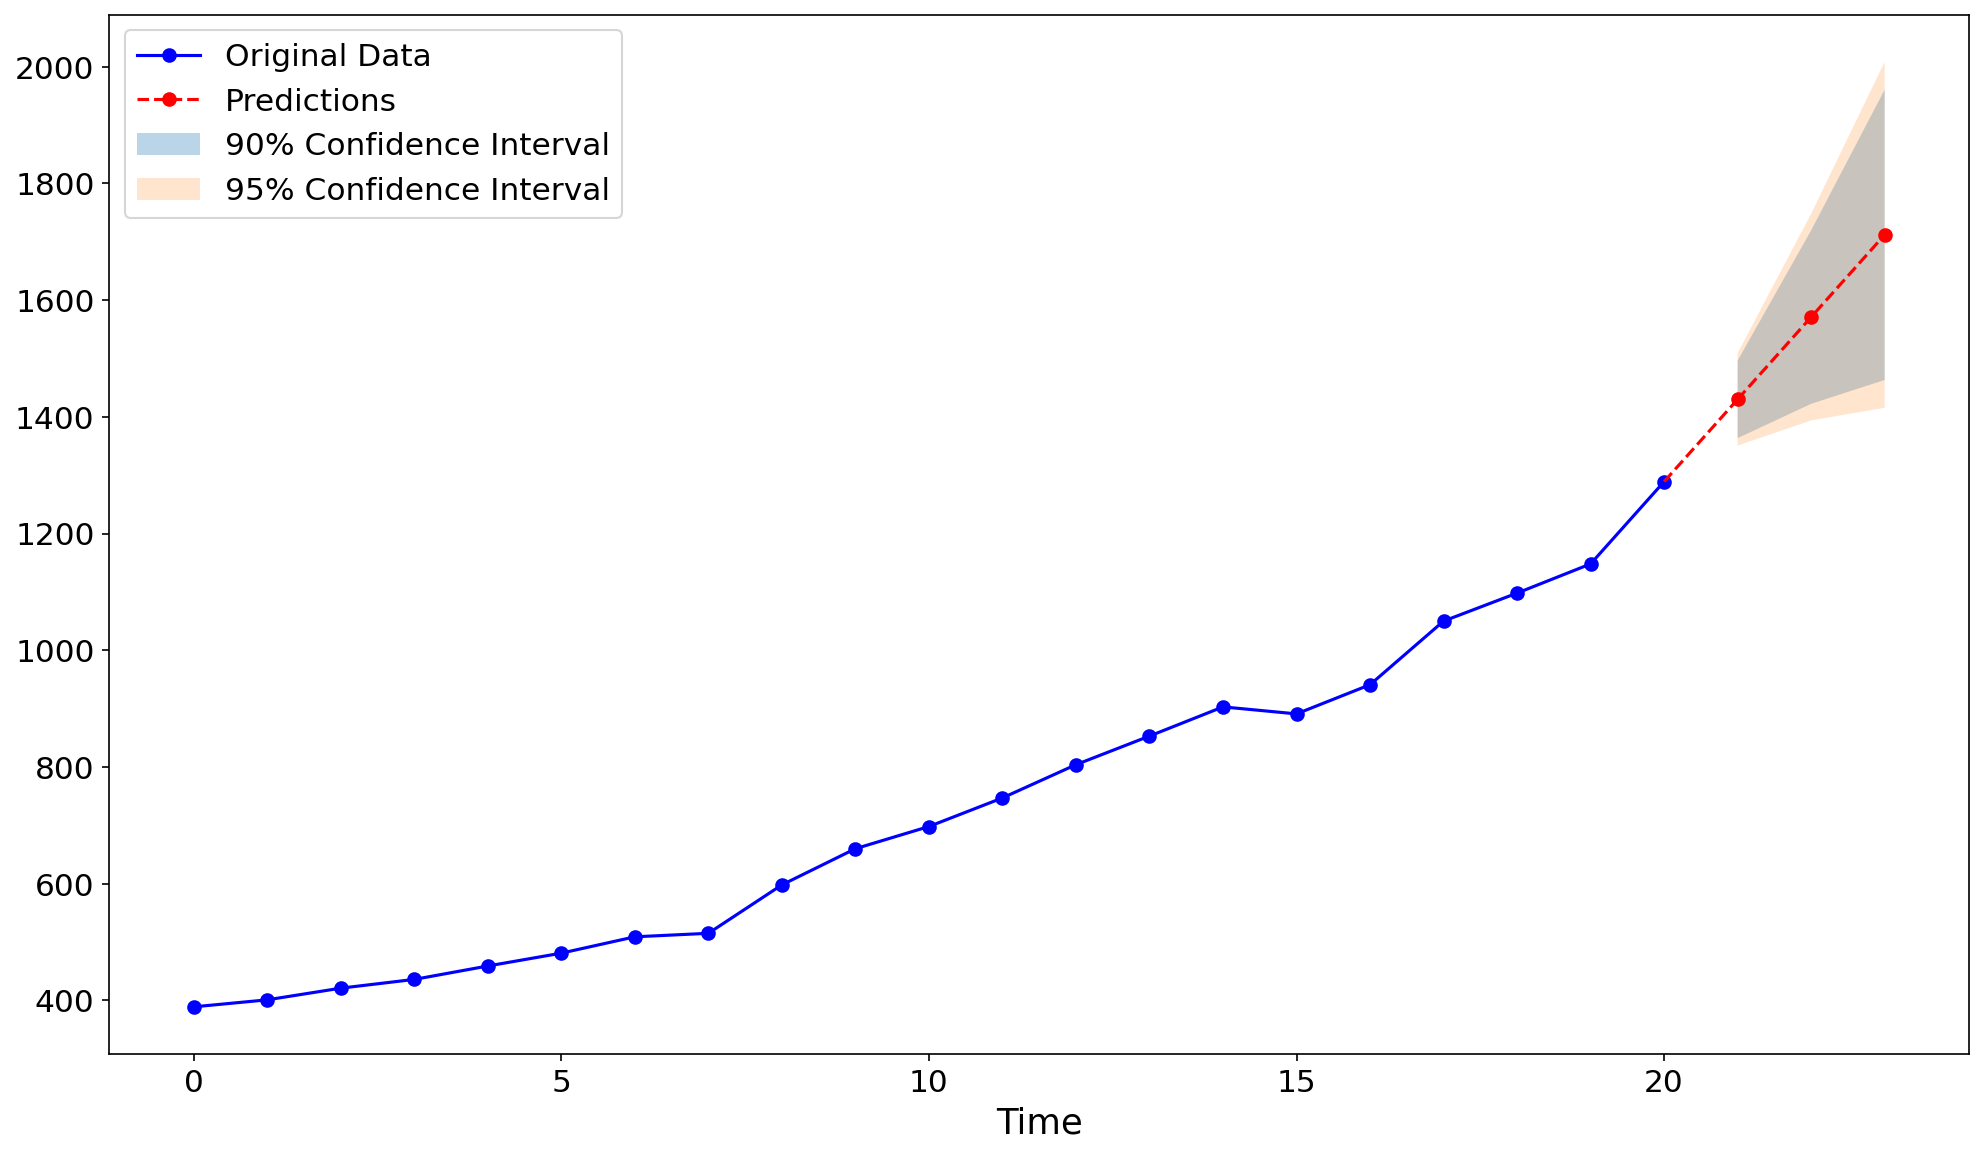

In [22]:
## 模型的预测
df_fore = res.get_forecast(steps=3)

confint1=df_fore.summary_frame(alpha=0.10)
confint2=df_fore.summary_frame(alpha=0.05).iloc[:,2:]
confint1.columns=["mean","mean_se","90%lower","90%upper"]
confint2.columns=["95%lower","95%upper"]
confint = pd.concat([confint1,confint2],axis=1,ignore_index=False)
print(confint)

plt.figure(figsize=(16, 9), dpi=150)
plt.plot(range(len(data)), data, linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(data), len(data) + len(confint["mean"])), confint["mean"], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Predictions')
plt.fill_between(range(len(data), len(data) + len(confint["mean"])), confint["90%lower"], confint["90%upper"], alpha=0.3, label='90% Confidence Interval')
plt.fill_between(range(len(data), len(data) + len(confint["mean"])), confint["95%lower"], confint["95%upper"], alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data) - 1
last_pred_index = len(data)
plt.plot([last_data_index, last_pred_index], [data[last_data_index], confint["mean"][last_pred_index-len(data)]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=15)
plt.savefig(fname='预测结果.png')